<a href="https://colab.research.google.com/github/Knxd3/CE888/blob/main/Lab6/Lab6_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


In [12]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df_1.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [47]:
# convert to z scale

x = df_1.iloc[:,1:df_1.shape[1]].values
x = scale(x)

x

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [39]:
# use K-means because the number of clusters is given and the data is not extremely noisy

from sklearn.cluster import KMeans

m = KMeans(n_clusters = 3)
pred_ = m.fit_predict(x)

Text(0.5, 1.0, 'Cluster by GDP per Person vs. Health')

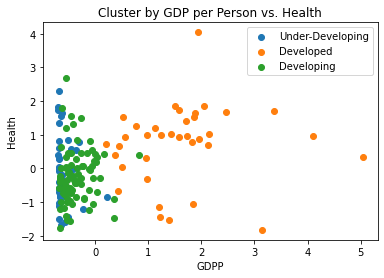

In [50]:
plt.scatter(x[pred_== 0 , 8], x[pred_ == 0, 2])
plt.scatter(x[pred_== 1, 8], x[pred_ == 1, 2])
plt.scatter(x[pred_ == 2,8], x[pred_ == 2, 2])
plt.legend(['Under-Developing','Developed', 'Developing'])
plt.xlabel('GDPP')
plt.ylabel('Health')
plt.title('Cluster by GDP per Person vs. Health')

In [49]:
print('Developed Countries \n', df_1.iloc[pred_ == 1, 0])
print('Developing Countries \n', df_1.iloc[pred_ == 2, 0])
print('Under-Developing Countries \n', df_1.iloc[pred_ == 0, 0])

Developed Countries 
 7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdo